<a href="https://colab.research.google.com/github/iamakshay0228/Classification-ML-model/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project** **Name**- Credit Card Default Prediction

##**Contribution**-Individual

## **Submitted by**- Akshay  Ingle

##**GitHub Link**-

##Project Description
This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

## Problem Statement

The main objective is to build a model that can predict whether a customer is a defaulter or not using various classification technique.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cc_df = pd.read_excel('/content/default of credit card clients.xls')

In [ ]:
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Exploratory Data Analysis

In [ ]:
cc_df['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


Lets assume "2" as female and "1" as male in SEX column of the dataset.

<ipython-input-11-2341afaceb88>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cc_df['AGE'], color="y")


<Axes: xlabel='AGE', ylabel='Density'>

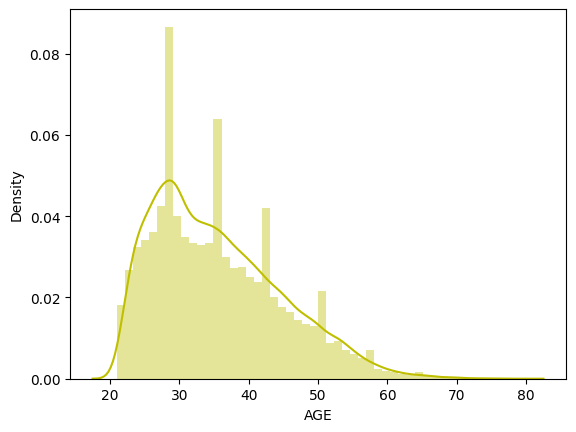

In [ ]:
sns.distplot(cc_df['AGE'], color="y")

Text(0.5, 1.0, 'percentage of default customers')

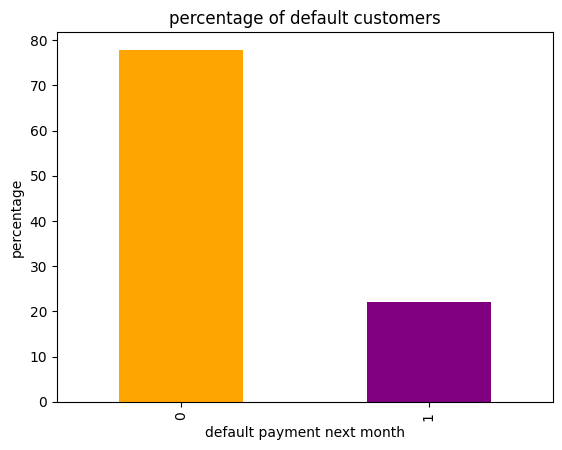

In [ ]:
Default_percentage = cc_df['default payment next month'].value_counts(normalize= True)*100
colors=['orange','purple']
Default_percentage.plot.bar(color=colors)
plt.ylabel('percentage')
plt.title('percentage of default customers')

 In default payment next month column "0" represents customers that have payed their credit card bill sucessfully and "1" represents customers that have defaulted on their credit card bill.

<Axes: xlabel='SEX', ylabel='count'>

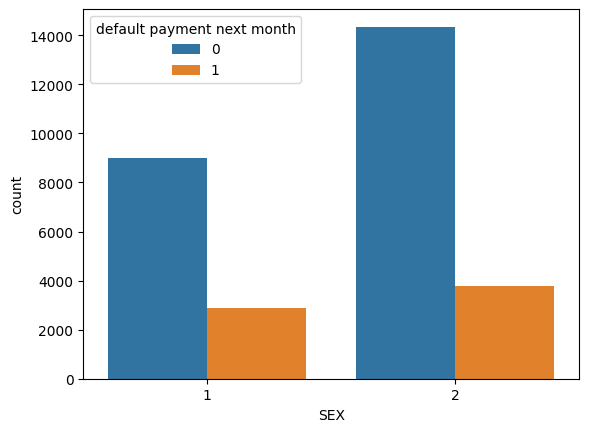

In [ ]:
sns.countplot(x = 'SEX', hue= 'default payment next month', data = cc_df)

In [ ]:
cc_df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

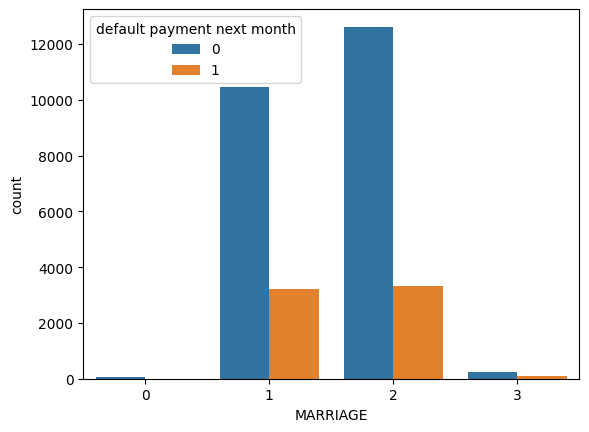

In [ ]:
sns.countplot(x = 'MARRIAGE', hue = 'default payment next month', data = cc_df)

  Marriage columns represent the maritial status of the customer, for our convinience we are assuming "1" as married , "2" as single, "0" as not declared, "3" as others.

In [ ]:
bins = [0, 20, 30,40,50,60,70,80]
Age_group=pd.cut(cc_df['AGE'], bins).value_counts()

In [ ]:
cc_df['Age_group'] = pd.cut(cc_df['AGE'], bins)

<Axes: xlabel='Age_group', ylabel='count'>

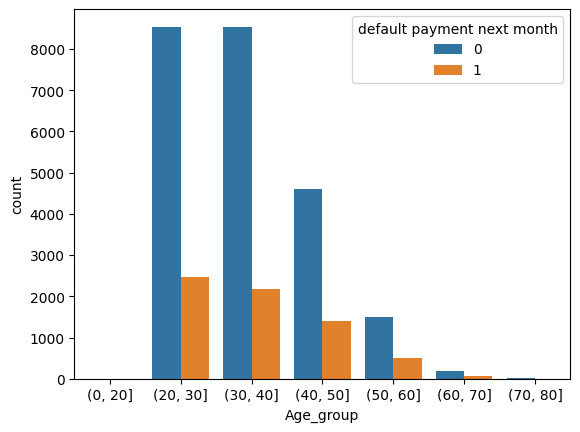

In [ ]:
sns.countplot(x = 'Age_group', hue = 'default payment next month', data = cc_df)


In [ ]:
cc_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
bins = [10000,50000,100000,500000,1000000]
cc_df['limitbal_group']= pd.cut(cc_df['LIMIT_BAL'], bins)

<Axes: xlabel='limitbal_group', ylabel='count'>

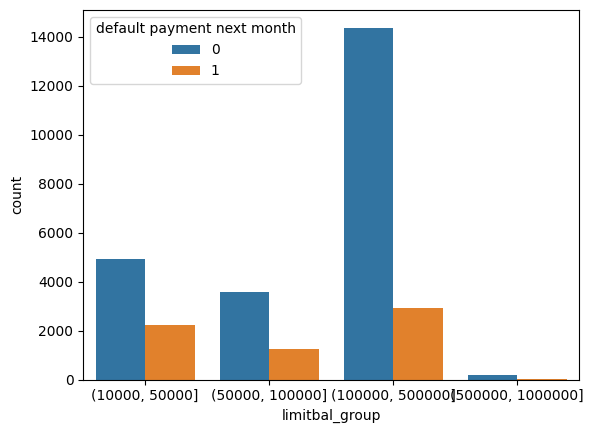

In [ ]:
sns.countplot(x = 'limitbal_group', hue = 'default payment next month', data = cc_df)

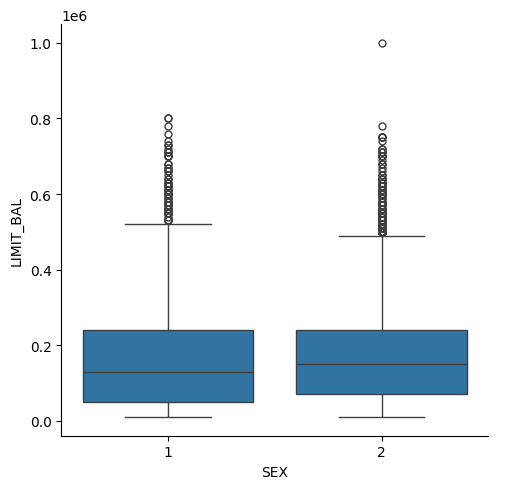

In [ ]:
sns.catplot(data=cc_df,x="SEX",y="LIMIT_BAL",kind="box")

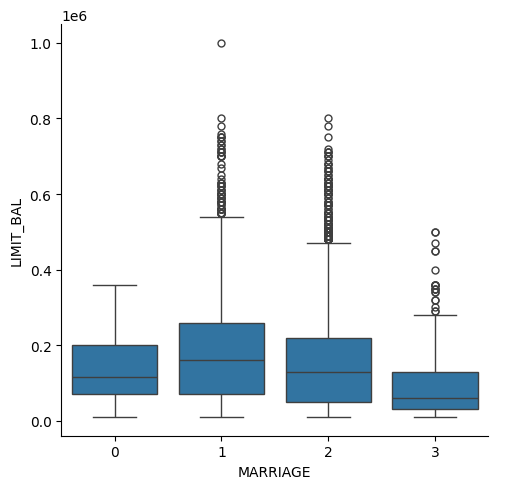

In [ ]:
sns.catplot(data=cc_df,x="MARRIAGE",y="LIMIT_BAL",kind="box")

## Model Building

In [ ]:
X= cc_df.drop(['default payment next month','ID'],axis=1)
Y=cc_df['default payment next month']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
X.shape, Y.shape

((30000, 23), (30000,))

In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)


(22500, 23) (22500,)
(7500, 23) (7500,)


1. XGB Classifier model

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, Y_train)

# predict
xgb_Y_predict = xgb_model.predict(X_test)



In [ ]:
print('ROCAUC score:', roc_auc_score(Y_test, xgb_Y_predict))

ROCAUC score: 0.6477108436707425


In [ ]:
print('f1_score',f1_score(Y_test,xgb_Y_predict))

f1_score 0.45429793854531314


2 Random Forest classifier

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=150,
                       n_estimators=80)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
test_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [ ]:
train_cm

array([[16720,   812],
       [ 3168,  1800]])

In [ ]:
test_cm

array([[5559,  273],
       [1094,  574]])

In [ ]:
print('f1_score for training data set',f1_score(Y_train,train_class_preds))

f1_score for training data set 0.474934036939314


In [ ]:
print('f_1 score for testing data set',f1_score(Y_test,test_class_preds))

f_1 score for testing data set 0.4564612326043737


In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.8021302282589409

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.7779453906010994

In [ ]:
cc_df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,Y)

print('Original dataset shape', len(cc_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
# Splitting the dataset into the Training set and Test set
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X1_train, Y1_train)

# predict
xgb_y_predict = xgb_model.predict(X1_test)



In [ ]:
# Calculate ROC_AUC socre
print('ROCAUC score_test:', roc_auc_score(Y1_test, xgb_y_predict))

ROCAUC score_test: 0.8212742076300787


In [ ]:
# Calculate F1_score
print('f1_score',f1_score(Y1_test,xgb_y_predict))

f1_score 0.8168056164984643


In [ ]:
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X1_train,Y1_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.5s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
train_class_preds = rf_optimal_model.predict(X1_train)
test_class_preds = rf_optimal_model.predict(X1_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X1_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X1_test)[:,1]

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(Y1_train,train_preds)

0.8563262814744417

In [ ]:
# Calculate F1 Score
print('f1_score for training data set',f1_score(Y1_train,train_class_preds))
print('f_1 score for testing data set',f1_score(Y1_test,test_class_preds))

f1_score for training data set 0.7592634560906516
f_1 score for testing data set 0.7514490282986702


# Conclusion




* From all baseline model, Random forest classifier shows highest test accuracy and F1 score and AUC.
* Baseline model of Random forest and decision tree shows huge difference in train and test accuracy which shows overfitting.


* After handling class imbalance using **SMOTE**, XG Boost shows highest F1 score of 0.816

*  


